## MACHINE LEARNING: SUPPORT VECTOR CLASSIFIER

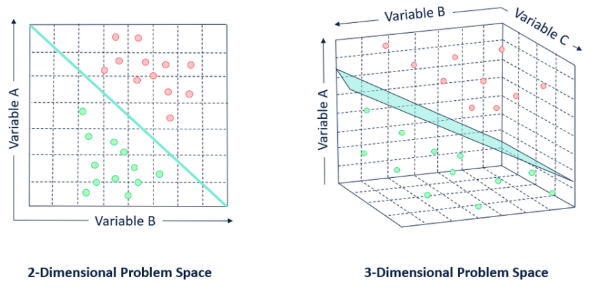

#### HEMANT THAPA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import statistics as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

## 1. DATA ANALYSIS 

In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df[:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

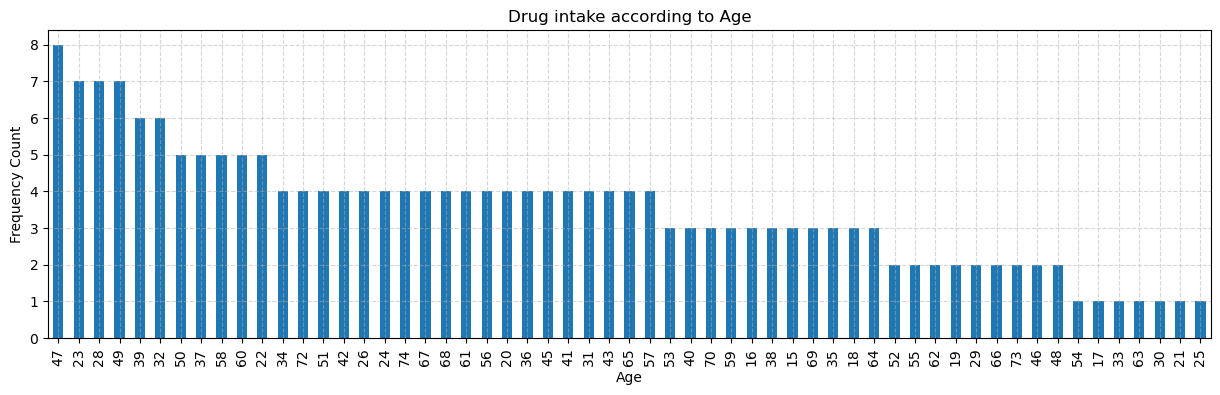

In [6]:
plt.figure(figsize=(15,4))
df.Age.value_counts().plot(kind="bar")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency Count")
plt.title("Drug intake according to Age")
plt.show()

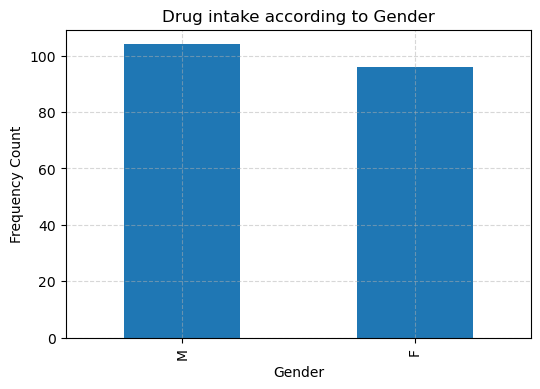

In [7]:
plt.figure(figsize=(6,4))
df.Sex.value_counts().plot(kind="bar")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Gender")
plt.ylabel("Frequency Count")
plt.title("Drug intake according to Gender")
plt.show()

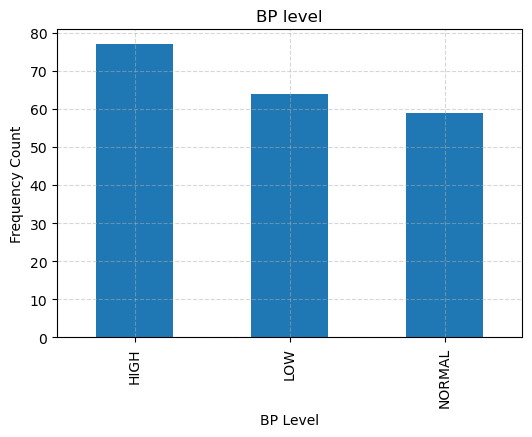

In [8]:
plt.figure(figsize=(6,4))
df.BP.value_counts().plot(kind="bar")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("BP Level")
plt.ylabel("Frequency Count")
plt.title("BP level")
plt.show()

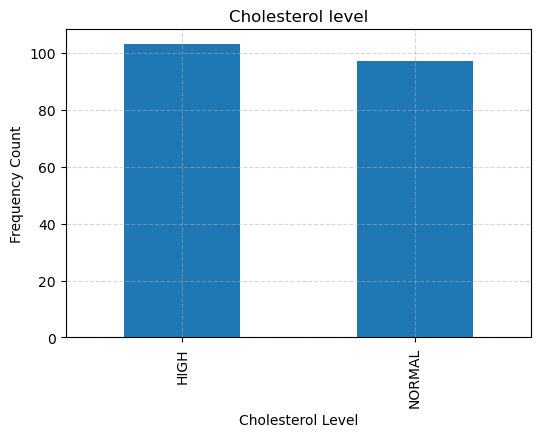

In [9]:
plt.figure(figsize=(6,4))
df.Cholesterol.value_counts().plot(kind="bar")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency Count")
plt.title("Cholesterol level")
plt.show()

## 2. INVESTIGATING MALE & FEMALE DATASET

In [10]:
df_male = df[df['Sex']=="M"]
df_female = df[df['Sex']=="F"]

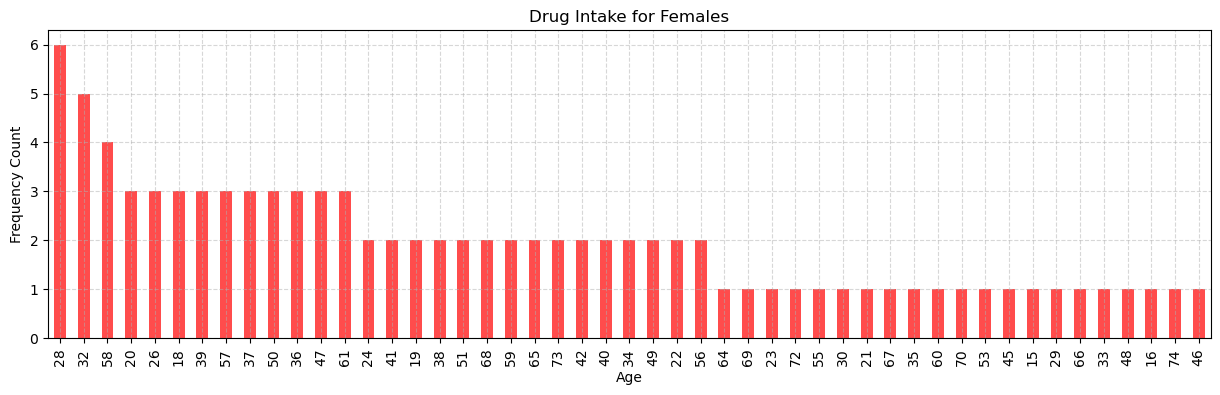

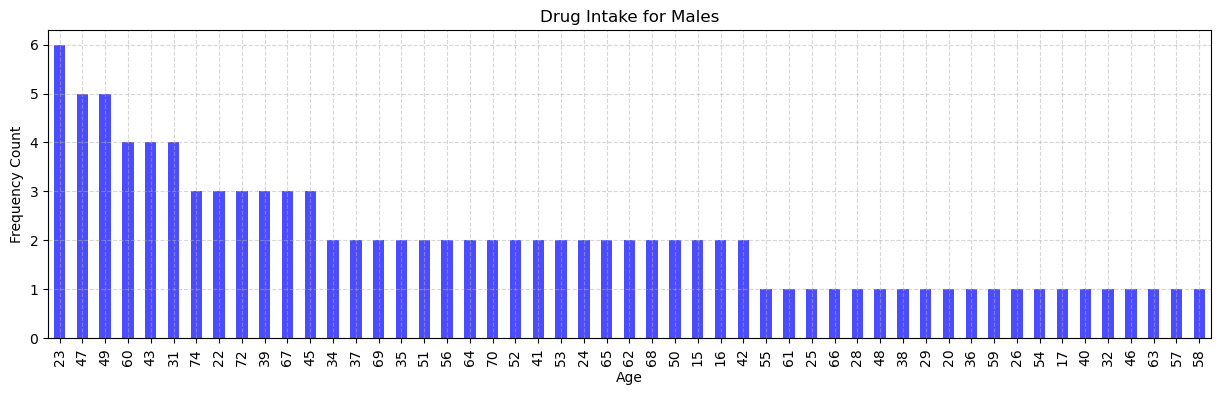

In [11]:
plt.figure(figsize=(15, 4))
df_female.Age.value_counts().plot(kind="bar", color="red", alpha=0.7)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency Count")
plt.title("Drug Intake for Females")
plt.show()

plt.figure(figsize=(15, 4))
df_male.Age.value_counts().plot(kind="bar", color="blue", alpha=0.7)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency Count")
plt.title("Drug Intake for Males")
plt.show()

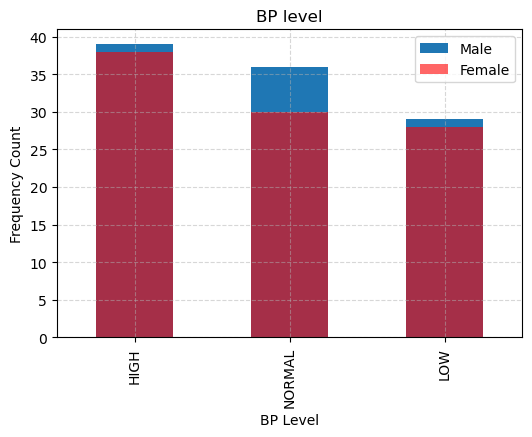

In [12]:
plt.figure(figsize=(6,4))
df_male.BP.value_counts().plot(kind="bar", label="Male")
df_female.BP.value_counts().plot(kind="bar", color="red", alpha=0.6, label="Female")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("BP Level")
plt.ylabel("Frequency Count")
plt.title("BP level")
plt.legend()
plt.show()

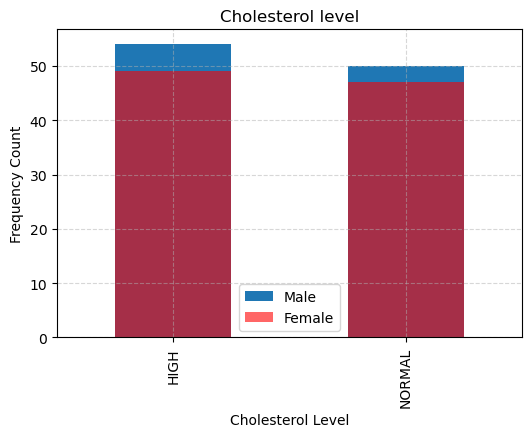

In [13]:
plt.figure(figsize=(6,4))
df_male.Cholesterol.value_counts().plot(kind="bar", label="Male")
df_female.Cholesterol.value_counts().plot(kind="bar", color="red", alpha=0.6, label="Female")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency Count")
plt.title("Cholesterol level")
plt.legend()
plt.show()

## 3. SUPPORT VECTOR CLASSIFIER PART 1

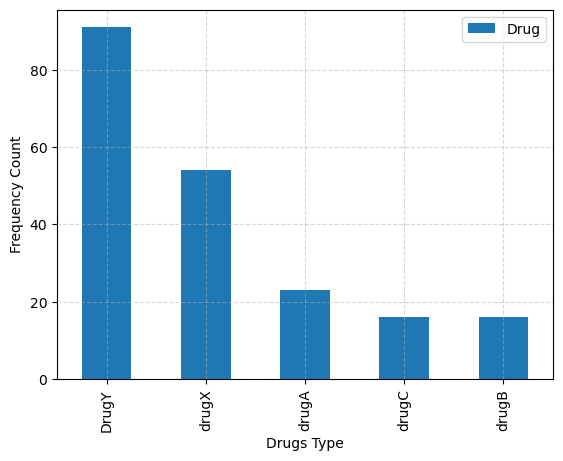

In [14]:
df['Drug'].value_counts().plot(kind="bar")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Drugs Type")
plt.ylabel("Frequency Count")
plt.legend()
plt.show()

In [15]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [16]:
df['Drug'] = df['Drug'].replace('DrugY', 0)
df['Drug'] = df['Drug'].replace('drugC', 1)
df['Drug'] = df['Drug'].replace('drugX', 2)
df['Drug'] = df['Drug'].replace('drugA', 3)
df['Drug'] = df['Drug'].replace('drugB', 4)

In [17]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [18]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [19]:
df.Drug.unique()

array([0, 1, 2, 3, 4])

In [20]:
df[:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,0
1,47,M,LOW,HIGH,13.093,1
2,47,M,LOW,HIGH,10.114,1
3,28,F,NORMAL,HIGH,7.798,2
4,61,F,LOW,HIGH,18.043,0


In [21]:
X = df[['Age', 'Na_to_K']].values.reshape(-2,2)

In [22]:
X = (X - X.mean())/X.std()

In [23]:
X[:5]

array([[-0.3787368 , -0.25485387],
       [ 0.88376434, -0.89988674],
       [ 0.88376434, -1.0565947 ],
       [-0.11571573, -1.17842606],
       [ 1.62022334, -0.63949588]])

In [24]:
y = df['Drug'].values

In [25]:
y

array([0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 3, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 4, 2, 0, 2, 2, 3, 2, 2, 2, 0, 4, 0, 2,
       2, 2, 3, 1, 0, 0, 0, 2, 0, 0, 4, 1, 4, 0, 2, 0, 0, 3, 0, 2, 4, 0,
       3, 2, 0, 0, 4, 0, 2, 0, 0, 0, 3, 0, 3, 2, 4, 2, 1, 3, 1, 4, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 1, 2, 0, 2, 2, 0, 4, 0,
       3, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 4, 3, 4, 2, 3, 0, 4, 0, 3, 2, 2, 3, 2, 1, 3, 4, 2, 2,
       0, 1, 3, 0, 1, 2, 2, 4, 2, 0, 0, 0, 0, 2, 0, 3, 2, 2, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 1, 0, 1, 1, 2,
       2, 2])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

In [27]:
svm = SVC(kernel='linear', C=1000)
svm.fit(X_train, y_train)


SVC(C=1000, kernel='linear')

In [28]:
y_pred = svm.predict(X_test)
y_pred

array([2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2,
       4, 2, 0, 0, 0, 0, 0, 2, 4, 2, 2, 2, 0, 0, 2, 0, 2, 2])

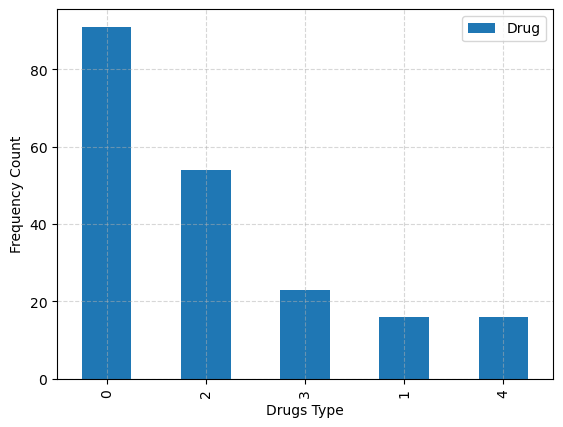

In [29]:
df['Drug'].value_counts().plot(kind="bar")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Drugs Type")
plt.ylabel("Frequency Count")
plt.legend()
plt.show()

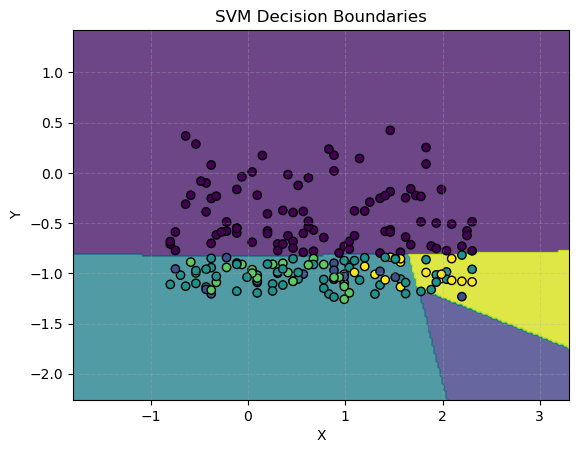

In [30]:
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVM Decision Boundaries')
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.775


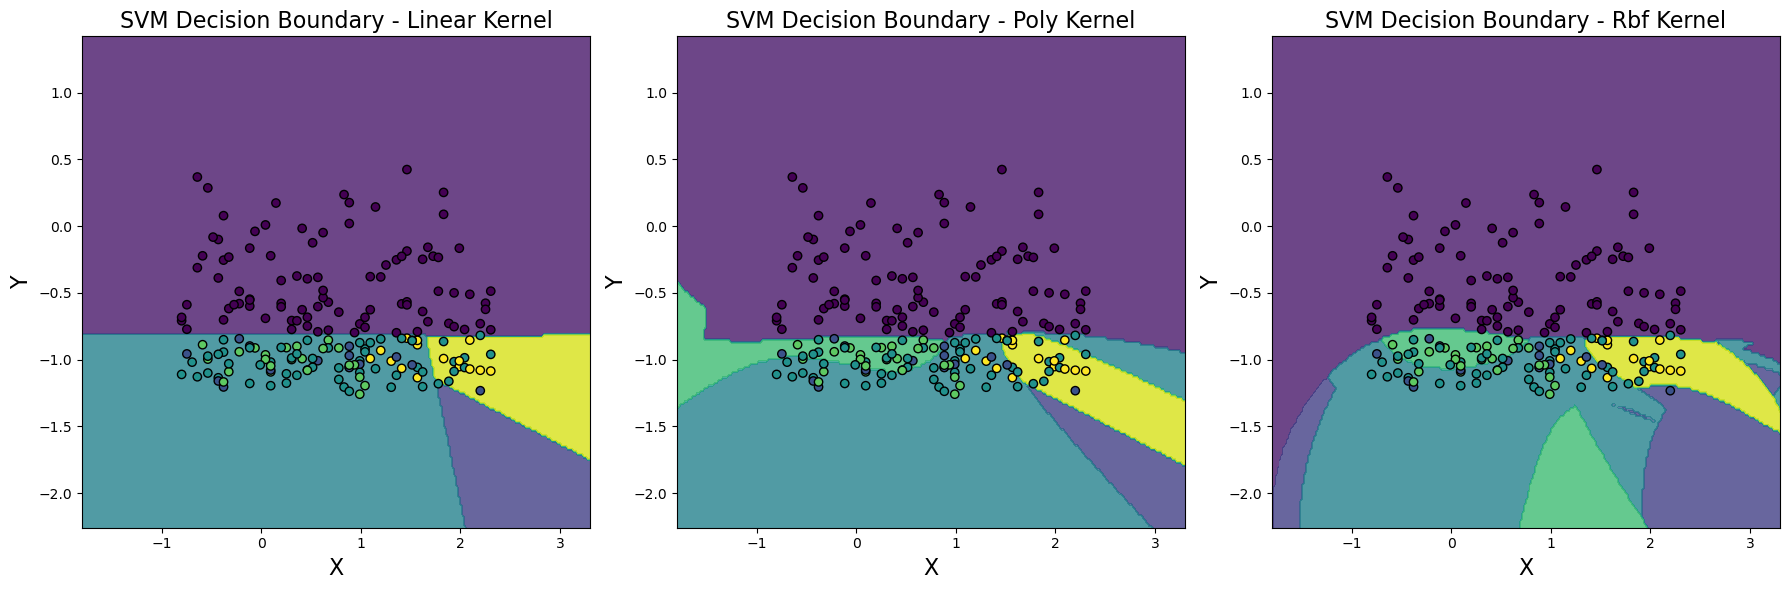

In [32]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

kernels = ['linear', 'poly', 'rbf']  
colors = ['red', 'blue', 'green']     

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for idx, kernel in enumerate(kernels):
    svm = SVC(kernel=kernel, C=100)
    svm.fit(X_train, y_train)
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axs[idx].contourf(xx, yy, Z, alpha=0.8)
    axs[idx].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    axs[idx].set_xlabel('X', fontsize=16)
    axs[idx].set_ylabel('Y', fontsize=16)
    axs[idx].set_title(f'SVM Decision Boundary - {kernel.capitalize()} Kernel', fontsize=16)
plt.tight_layout()
plt.show()

## 4. SUPPORT VECTOR CLASSIFIER PART 2

In [33]:
dataset = {
    'age': [25, 45, 30, 50, 40, 60, 20, 55, 32, 38, 28, 48, 22, 29, 51, 59, 23, 33, 41, 27,
            34, 47, 31, 49, 39, 61, 21, 56, 33, 37, 29, 49, 23, 30, 52, 60, 24, 35, 42, 26,
            44, 36, 54, 58, 37, 62, 19, 57, 35, 39, 30, 50, 26, 33, 53, 61, 27, 38, 43, 25,
            46, 37, 55, 63, 29, 58, 18, 59, 31, 34, 26, 51, 24, 32, 54, 62, 22, 37, 40, 24,
            43, 35, 53, 64, 28, 63, 17, 60, 30, 35, 27, 52, 26, 31, 55, 65, 21, 36, 41, 23],
    'salary': [50000, 75000, 60000, 100000, 80000, 120000, 45000, 110000, 55000, 65000,52000, 
               90000, 48000, 53000, 95000, 105000, 49000, 60000, 70000, 51000, 51000, 
               73000,59000, 98000, 78000, 122000, 44000, 112000, 54000, 63000, 51000, 
               93000, 46000, 54000, 97000, 108000, 50000, 61000, 72000, 53000, 56000, 
               66000,55000, 105000, 62000, 125000, 43000, 115000, 57000, 67000, 54000, 
               95000, 49000, 56000, 104000, 118000, 47000, 59000, 69000, 52000, 74000,
               58000,110000, 130000, 64000, 128000, 42000, 112000, 58000, 61000, 48000,
               100000, 46000, 54000, 107000, 125000, 45000, 62000, 72000, 50000, 53000,
               55000,108000, 135000, 58000, 130000, 41000, 115000, 55000, 58000, 47000,
               105000, 44000, 52000, 115000, 140000, 43000, 57000, 66000, 51000,],
    'purchased': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
                   0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
                   1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
                   0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
                 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
}


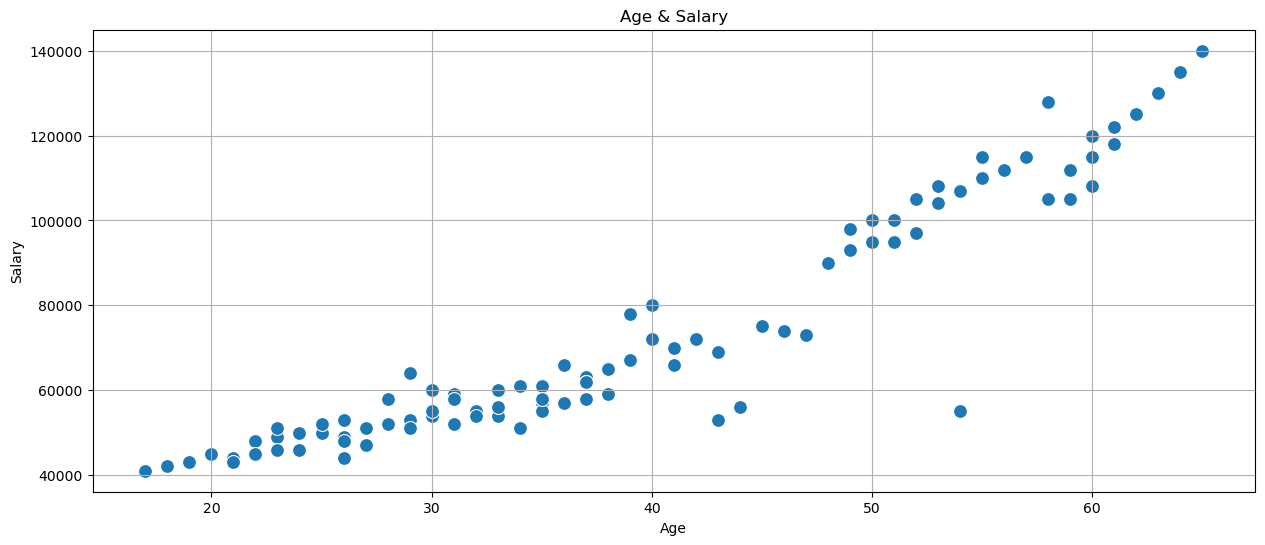

In [34]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='age', y='salary', data=dataset, s=100)
plt.grid(True)
plt.ylabel("Salary")
plt.xlabel("Age")
plt.title("Age & Salary")
plt.show()


## SVR

In [35]:
LinearModel = SVR(kernel='linear', C=1000)
LinearModel

SVR(C=1000, kernel='linear')

In [36]:
X = dataset['age']
X = np.array([X])
X = X.reshape(-1,1)
y = dataset['salary']

In [37]:
LinearModel.fit(X,y)

SVR(C=1000, kernel='linear')

In [38]:
y_pred = LinearModel.predict(X)

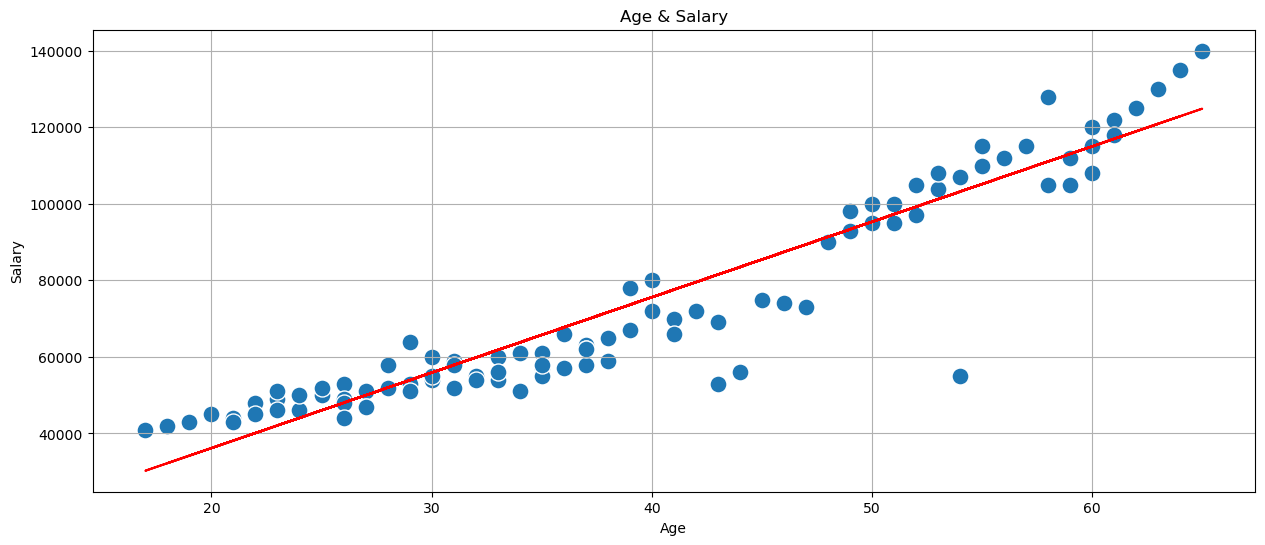

In [39]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='age', y='salary', data=dataset, s=150)
plt.plot(X, y_pred, color="red")
plt.grid(True)
plt.ylabel("Salary")
plt.xlabel("Age")
plt.title("Age & Salary")
plt.show()

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y, y_pred)

0.8880924392188275

## SVC

In [42]:
df = pd.DataFrame(dataset)

In [43]:
X = df.iloc[:, 0:2].values
X = X.reshape(-1, 2)

In [44]:
X[:5]

array([[    25,  50000],
       [    45,  75000],
       [    30,  60000],
       [    50, 100000],
       [    40,  80000]])

In [45]:
y = df['purchased']
y = y.values
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
svm_linear = SVC(kernel='linear', C=1).fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)

svm_poly = SVC(kernel='poly', C=1, degree=3).fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy (Polynomial Kernel):", accuracy_poly)

svm_rbf = SVC(kernel='rbf', C=1).fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF Kernel):", accuracy_rbf)


Accuracy (Linear Kernel): 0.95
Accuracy (Polynomial Kernel): 0.95
Accuracy (RBF Kernel): 0.95


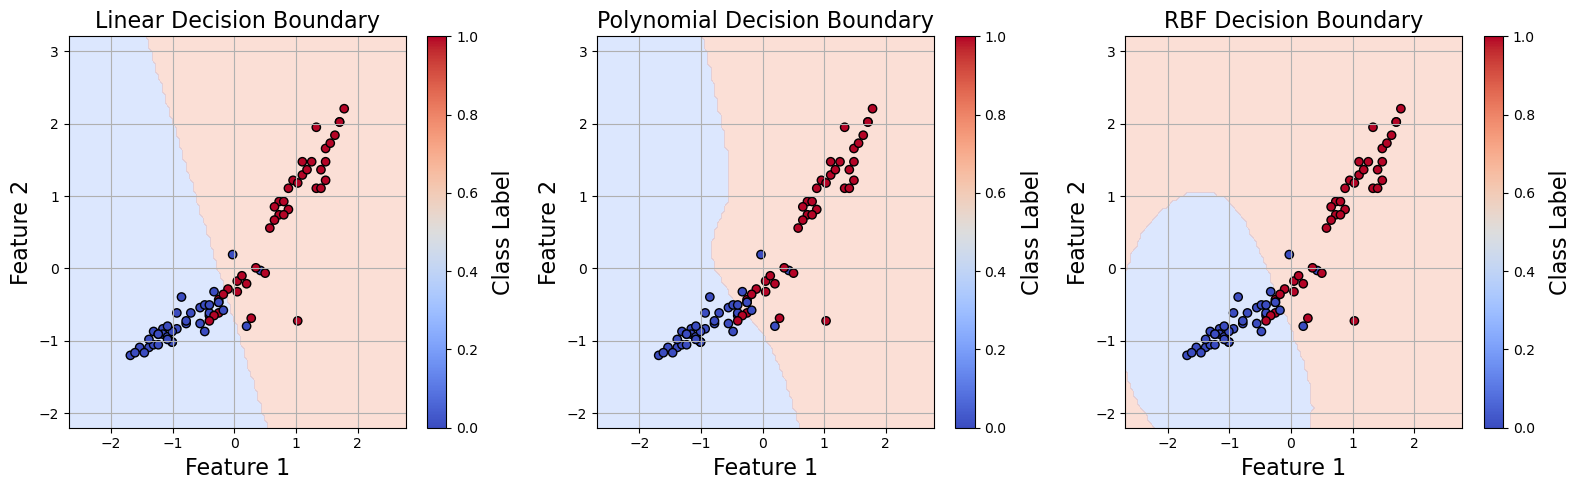

In [49]:
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 100),
                     np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 100))

Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

Z_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.contourf(xx, yy, Z_linear, levels=1, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature 1", fontsize=16)
plt.ylabel("Feature 2", fontsize=16)
plt.title("Linear Decision Boundary", fontsize=16)
plt.grid(True)
color_bar_linear = plt.colorbar()
color_bar_linear.set_label("Class Label", labelpad=10, fontsize=16)  

plt.subplot(132)
plt.contourf(xx, yy, Z_poly, levels=1, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature 1", fontsize=16)
plt.ylabel("Feature 2", fontsize=16)
plt.title("Polynomial Decision Boundary", fontsize=16)
plt.grid(True)
color_bar_poly = plt.colorbar()
color_bar_poly.set_label("Class Label", labelpad=10, fontsize=16)  

plt.subplot(133)
plt.contourf(xx, yy, Z_rbf, levels=1, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature 1", fontsize=16)
plt.ylabel("Feature 2", fontsize=16)
plt.title("RBF Decision Boundary", fontsize=16)
plt.grid(True)
color_bar_rbf = plt.colorbar()
color_bar_rbf.set_label("Class Label", labelpad=10, fontsize=16)  

plt.tight_layout()
plt.show()


## THREE DIMENSIONAL HYPER PLANE 

In [50]:
df[:10]

,age,salary,purchased
0,25,50000,0
1,45,75000,1
2,30,60000,0
3,50,100000,1
4,40,80000,0
5,60,120000,1
6,20,45000,0
7,55,110000,1
8,32,55000,0
9,38,65000,1


In [51]:
X = df[['age', 'salary']].values
y = df['purchased'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## LINEAR

In [53]:
svm = SVC(kernel='linear', C=1000)
svm.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [54]:
y_pred = svm.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Linear SVM):", accuracy)

Accuracy (Linear SVM): 0.95


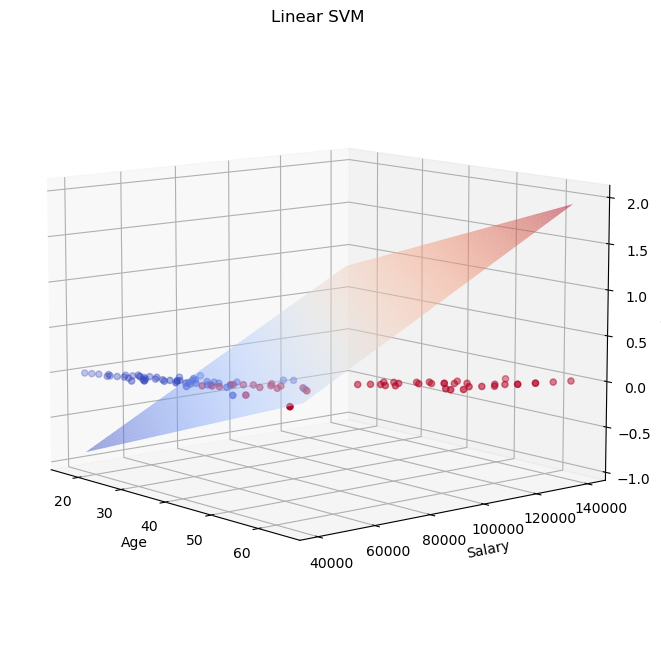

In [56]:
age_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
salary_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
age_values, salary_values = np.meshgrid(age_range, salary_range)
mesh_points = np.c_[age_values.ravel(), salary_values.ravel()]

decision_values = svm.decision_function(mesh_points)
decision_values = decision_values.reshape(age_values.shape)

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax1.plot_surface(age_values, salary_values, decision_values, cmap='coolwarm', alpha=0.5)
ax1.set_title('Linear SVM')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.set_zlabel('Hyper plane')
ax1.view_init(elev=10, azim=320)  
ax1.grid(True, linestyle='dashed', alpha=0.5)
y_pred = svm.predict(X_test)

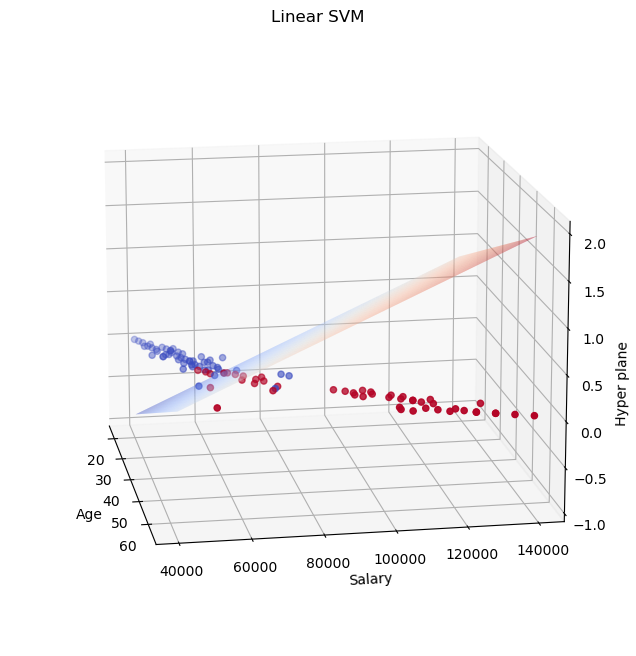

In [57]:
age_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
salary_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
age_values, salary_values = np.meshgrid(age_range, salary_range)
mesh_points = np.c_[age_values.ravel(), salary_values.ravel()]

decision_values = svm.decision_function(mesh_points)
decision_values = decision_values.reshape(age_values.shape)

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax1.plot_surface(age_values, salary_values, decision_values, cmap='coolwarm', alpha=0.5)
ax1.set_title('Linear SVM')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.set_zlabel('Hyper plane')
ax1.view_init(elev=15, azim=350)  
ax1.grid(True, linestyle='dashed', alpha=0.5)
y_pred = svm.predict(X_test)

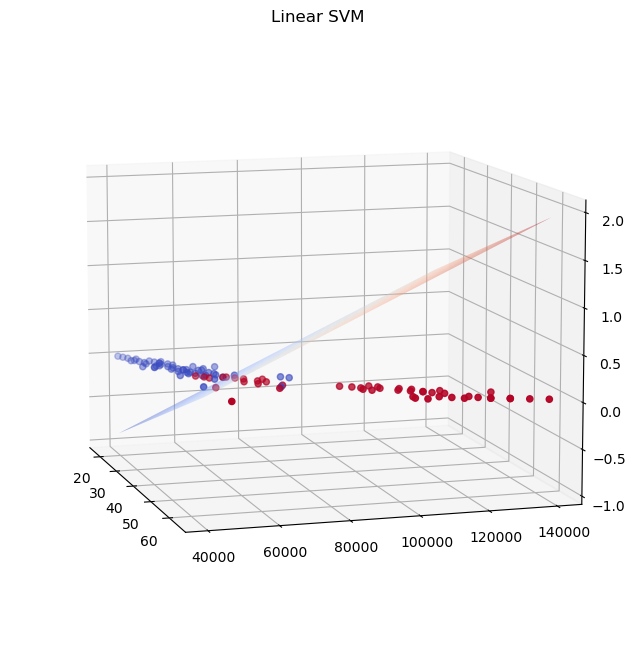

In [58]:
age_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
salary_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
age_values, salary_values = np.meshgrid(age_range, salary_range)
mesh_points = np.c_[age_values.ravel(), salary_values.ravel()]

decision_values = svm.decision_function(mesh_points)
decision_values = decision_values.reshape(age_values.shape)

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax1.plot_surface(age_values, salary_values, decision_values, cmap='coolwarm', alpha=0.5)
ax1.set_title('Linear SVM')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.set_zlabel('Hyper plane')
ax1.view_init(elev=10, azim=-17)  
ax1.dist = 10  
ax1.zaxis.labelpad = 90  
ax1.xaxis.labelpad = 90  
ax1.yaxis.labelpad = 90  
 
ax1.grid(True, linestyle='dashed', alpha=0.5)

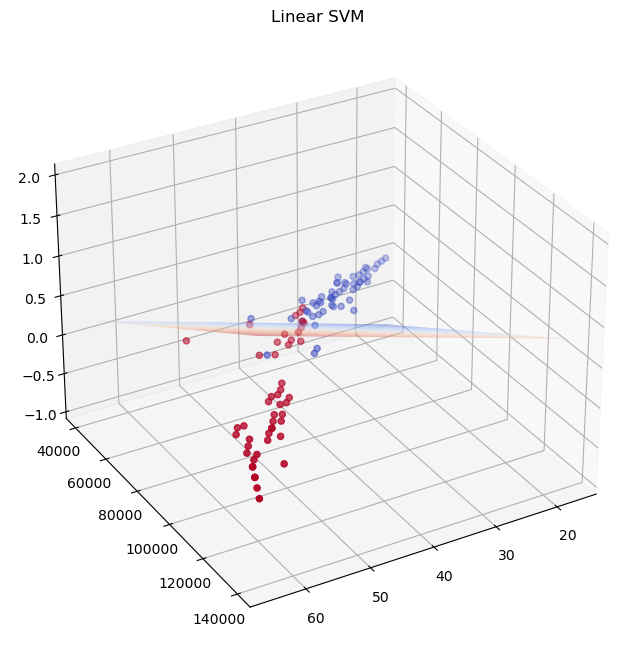

In [59]:
age_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
salary_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
age_values, salary_values = np.meshgrid(age_range, salary_range)
mesh_points = np.c_[age_values.ravel(), salary_values.ravel()]

decision_values = svm.decision_function(mesh_points)
decision_values = decision_values.reshape(age_values.shape)

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax1.plot_surface(age_values, salary_values, decision_values, cmap='coolwarm', alpha=0.5)
ax1.set_title('Linear SVM')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.set_zlabel('Hyper plane')
ax1.view_init(elev=30, azim=60) 
ax1.dist = 10 
ax1.zaxis.labelpad = 90 
ax1.xaxis.labelpad = 90 
ax1.yaxis.labelpad = 90 
 
ax1.grid(True, linestyle='dashed', alpha=0.5)

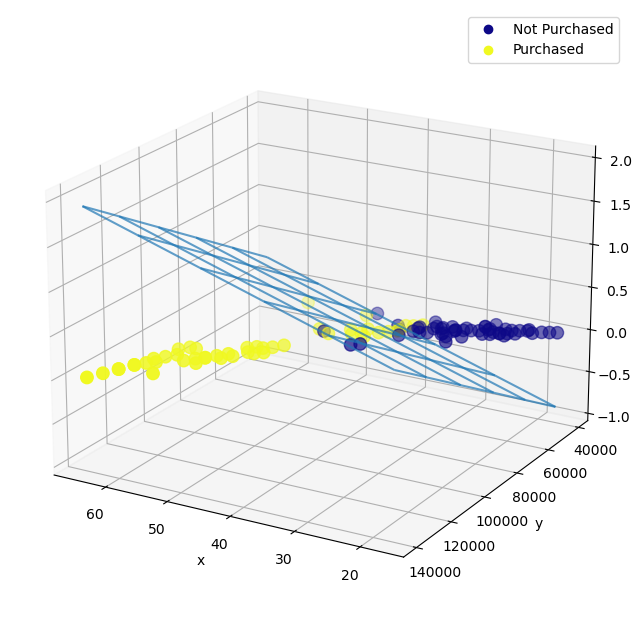

In [60]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(age_values, salary_values, 
                  decision_values, rstride=10, 
                  cstride=10, alpha=0.7, cmap='coolwarm')  
scatter = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='plasma', marker='o', s=80)  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=20, azim=120)  
handles, labels = scatter.legend_elements()
legend_labels = ['Not Purchased', 'Purchased']
ax.legend(handles, legend_labels, loc='upper right')
ax.grid(True, linestyle='dashed', alpha=0.5)
plt.show()

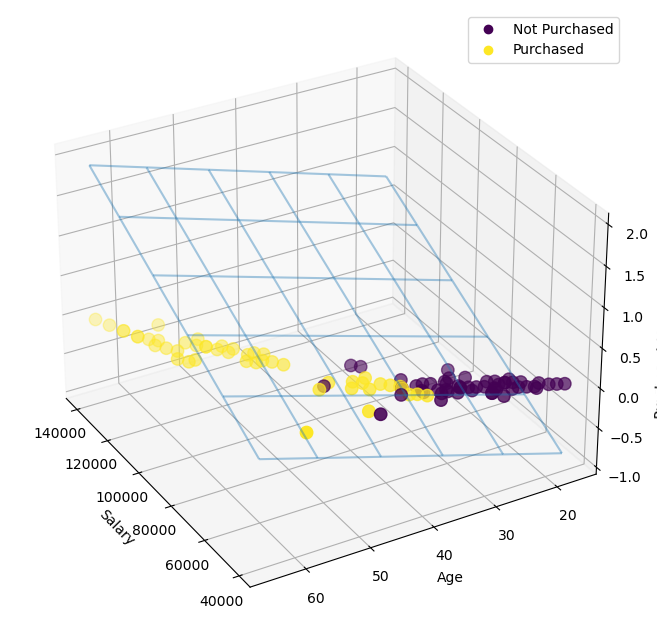

In [61]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(salary_values, age_values, decision_values, 
                  rstride=10, cstride=10, alpha=0.4, 
                  cmap='coolwarm') 
scatter = ax.scatter(X[:, 1], X[:, 0], y, c=y, cmap='viridis', marker='o', s=80)
ax.set_xlabel('Salary')
ax.set_ylabel('Age')
ax.set_zlabel('Purchased (0 or 1)')
ax.view_init(elev=30, azim=150)
handles, labels = scatter.legend_elements()
legend_labels = ['Not Purchased', 'Purchased']
ax.legend(handles, legend_labels, loc='upper right')
ax.grid(True, linestyle='dashed', alpha=0.5)
plt.show()

## 5. SUPPORT VECTOR CLASSIFIER PART 3

In [62]:
dataset = {
    'age': [25, 45, 30, 50, 40, 60, 20, 55, 32, 38, 28, 48, 22, 29, 51, 59, 23, 33, 41, 27],
    'salary': [50000, 75000, 60000, 100000, 80000, 120000, 45000, 110000, 55000, 65000,
               52000, 90000, 48000, 53000, 95000, 105000, 49000, 60000, 70000, 51000],
    'purchased': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
}

In [63]:
df = pd.DataFrame(dataset)
X = df[['age', 'salary']].values.reshape(-1, 2)
y = df['purchased'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)


In [65]:
X_train

array([[    28,  52000],
       [    33,  60000],
       [    20,  45000],
       [    29,  53000],
       [    40,  80000],
       [    30,  60000],
       [    60, 120000],
       [    51,  95000],
       [    38,  65000],
       [    55, 110000],
       [    23,  49000],
       [    48,  90000],
       [    50, 100000],
       [    25,  50000],
       [    59, 105000],
       [    22,  48000]])

In [66]:
svm_linear = SVC(kernel='linear', C=1000)
svm_poly = SVC(kernel='poly',degree=3, C=1000)

In [67]:
svm_linear.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [68]:
svm_poly.fit(X_train, y_train)

SVC(C=1000, kernel='poly')

In [69]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Linear SVM Accuracy:", accuracy_linear)
print("Polynomial SVM Accuracy:", accuracy_poly)

Linear SVM Accuracy: 1.0
Polynomial SVM Accuracy: 0.5


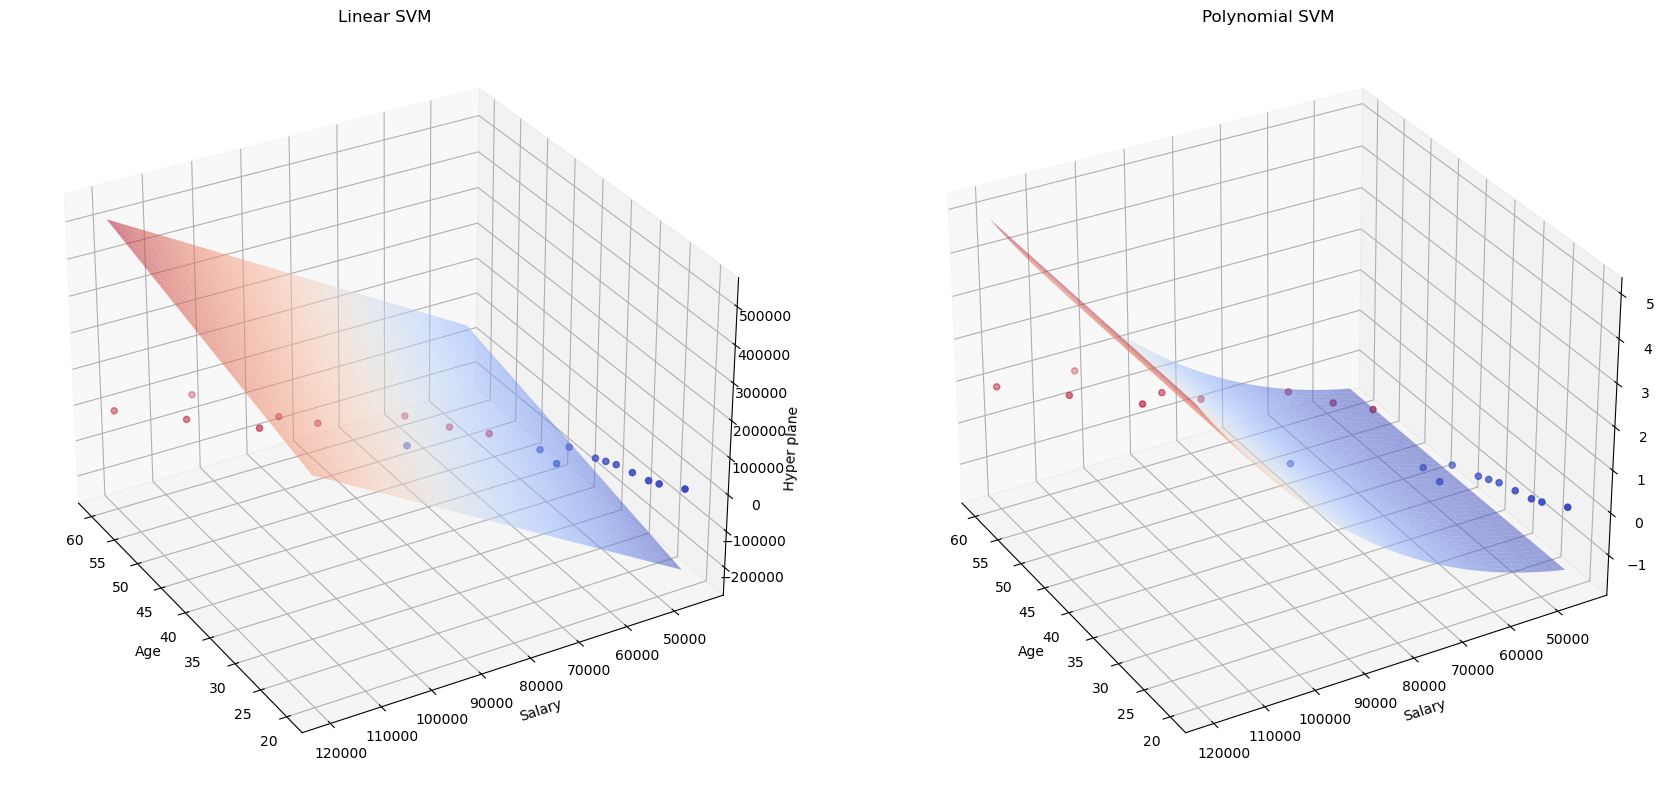

In [70]:
age_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
salary_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
age_values, salary_values = np.meshgrid(age_range, salary_range)
mesh_points = np.c_[age_values.ravel(), salary_values.ravel()]

decision_values_linear = svm_linear.decision_function(mesh_points)
decision_values_linear = decision_values_linear.reshape(age_values.shape)

decision_values_poly = svm_poly.decision_function(mesh_points)
decision_values_poly = decision_values_poly.reshape(age_values.shape)

fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax1.plot_surface(age_values, salary_values, decision_values_linear, cmap='coolwarm', alpha=0.5)
ax1.set_title('Linear SVM')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.set_zlabel('Hyper plane')
ax1.view_init(elev=30, azim=150)
ax1.grid(True, linestyle='dashed', alpha=0.5)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax2.plot_surface(age_values, salary_values, decision_values_poly, cmap='coolwarm', alpha=0.5)
ax2.set_title('Polynomial SVM')
ax2.set_xlabel('Age')
ax2.set_ylabel('Salary')
ax2.set_zlabel('Purchased (0 or 1)')
ax2.view_init(elev=30, azim=150)
ax2.grid(True, linestyle='dashed', alpha=0.5)
plt.tight_layout()
plt.show()

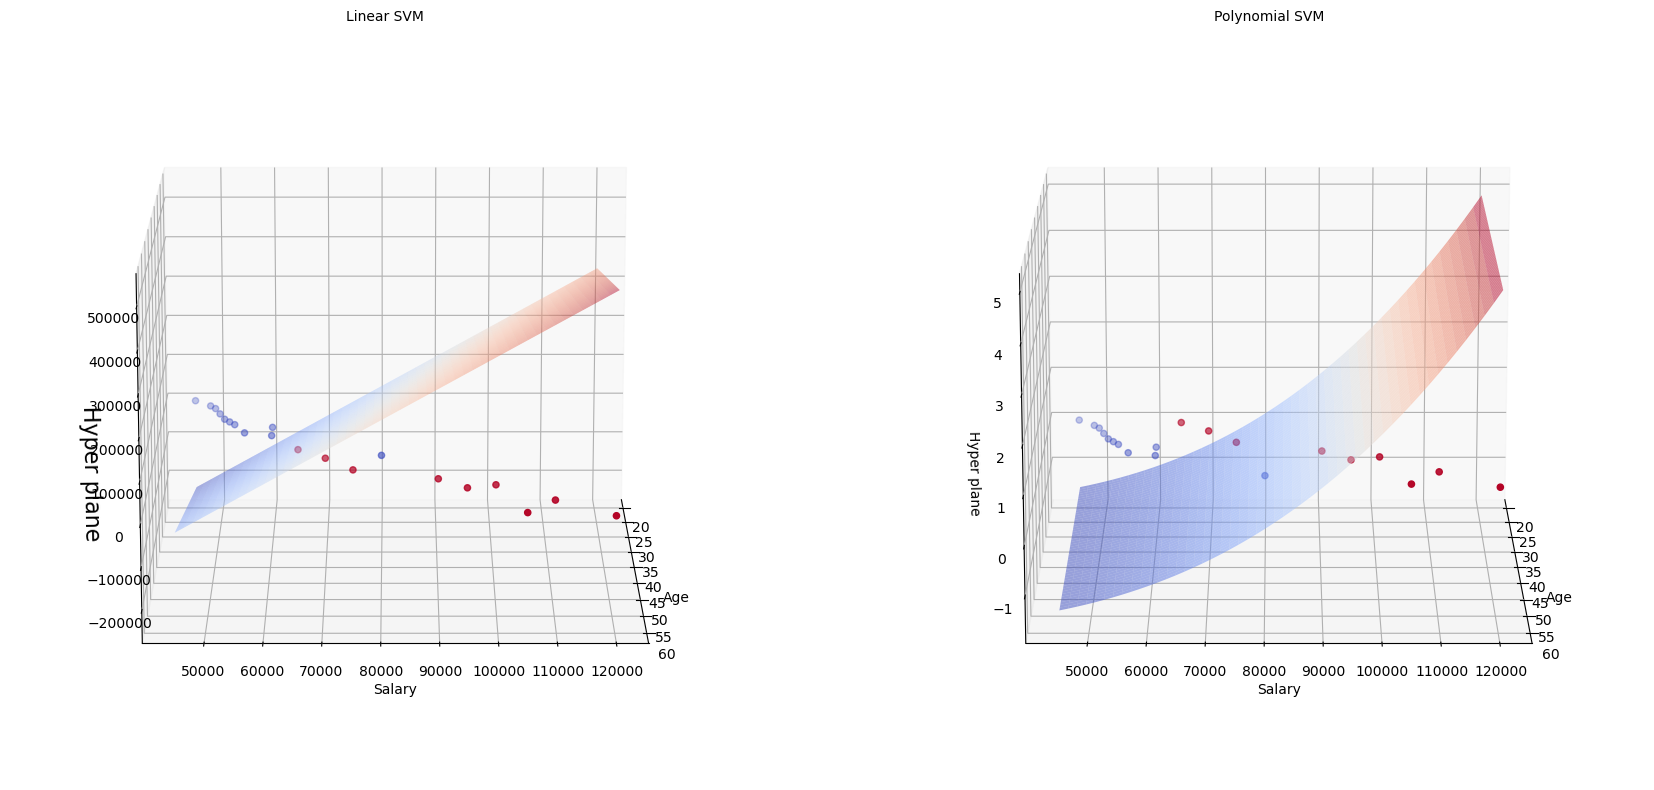

In [71]:
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax1.plot_surface(age_values, salary_values, decision_values_linear, cmap='coolwarm', alpha=0.5)
ax1.set_title('Linear SVM', fontsize=10)
ax1.set_xlabel('Age', fontsize=10)
ax1.set_ylabel('Salary', fontsize=10)
ax1.set_zlabel('Hyper plane', fontsize=16)
ax1.view_init(elev=15, azim=360) 
ax1.grid(True, linestyle='dashed', alpha=0.5)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax2.plot_surface(age_values, salary_values, decision_values_poly, cmap='coolwarm', alpha=0.5)
ax2.set_title('Polynomial SVM', fontsize=10)
ax2.set_xlabel('Age', fontsize=10)
ax2.set_ylabel('Salary', fontsize=10)
ax2.set_zlabel('Hyper plane', fontsize=10)
ax2.view_init(elev=15, azim=360)  
ax2.grid(True, linestyle='dashed', alpha=0.5)
plt.tight_layout()
plt.show()


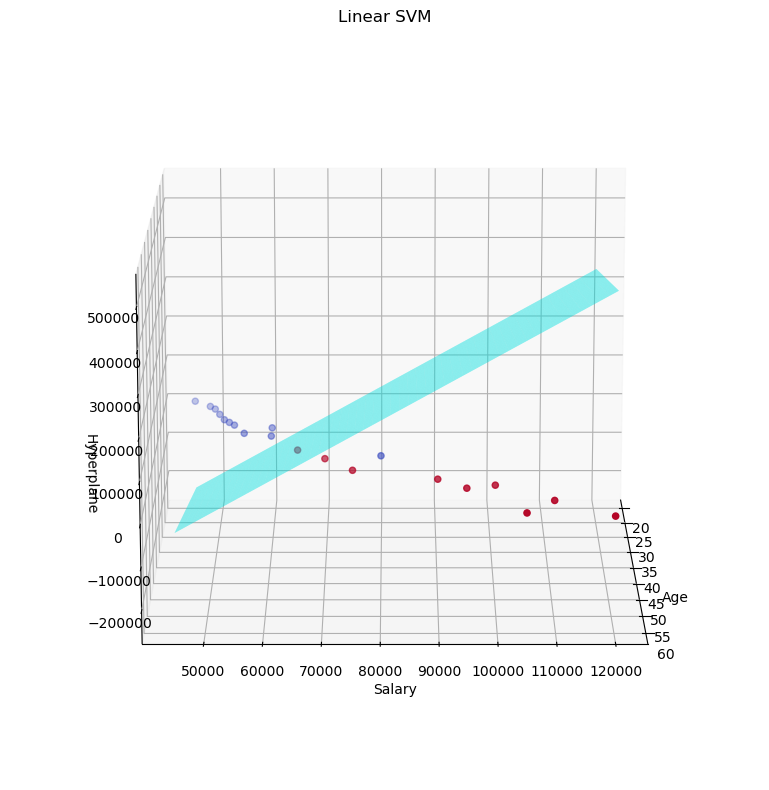

In [72]:
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax1.plot_surface(age_values, salary_values, decision_values_linear, color='cyan', alpha=0.5)
ax1.set_title('Linear SVM')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax1.set_zlabel('Hyperplane')
ax1.view_init(elev=15, azim=360)  
ax1.grid(True, linestyle='dashed', alpha=0.5)
plt.tight_layout()
plt.show()

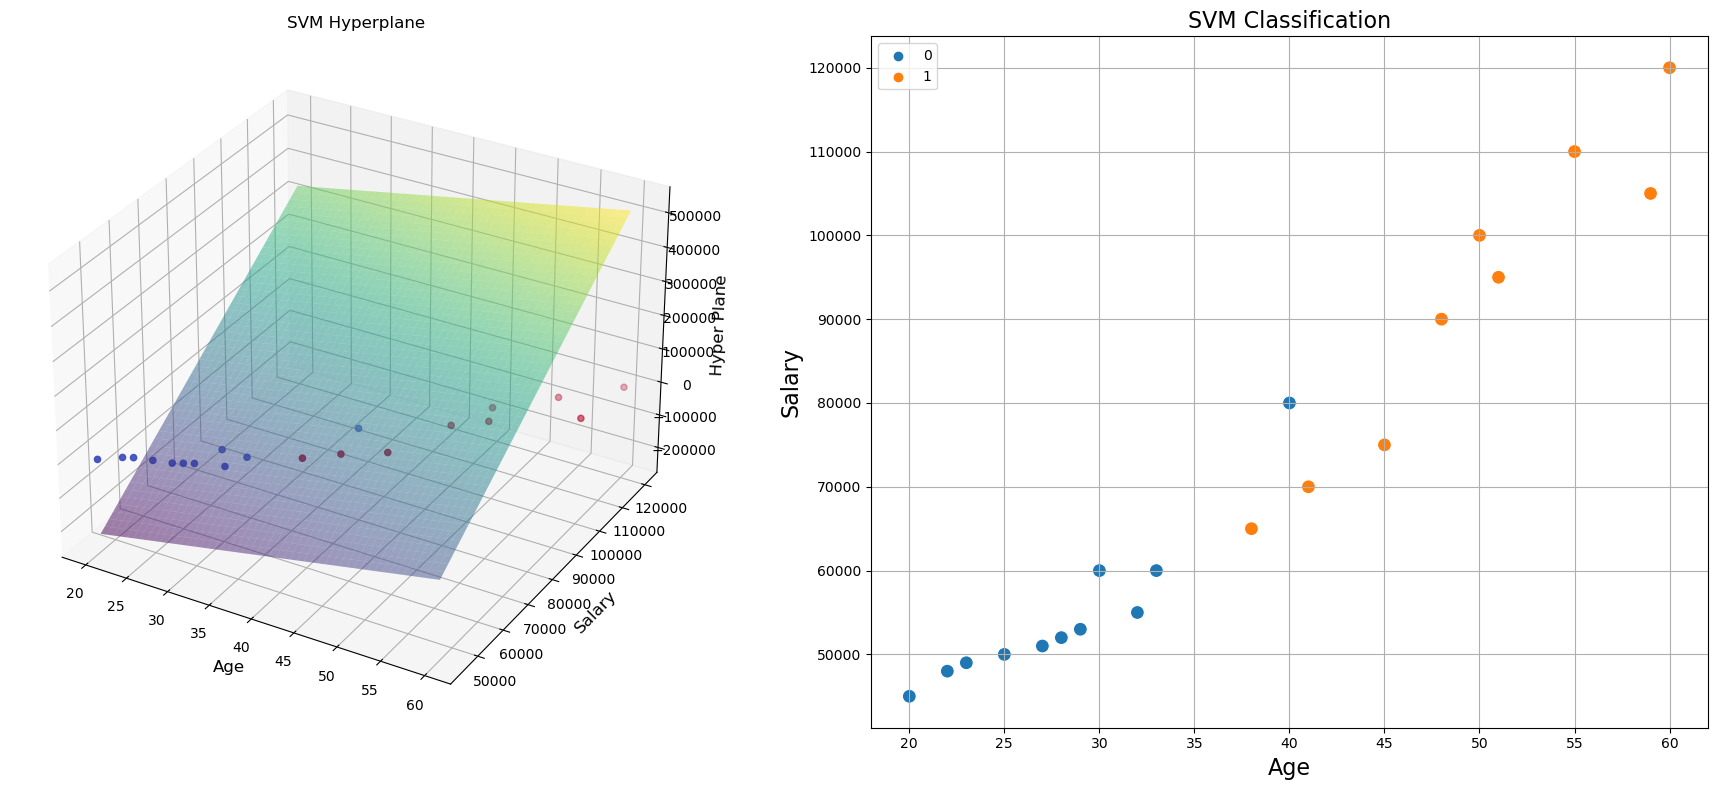

In [73]:
age_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
salary_values = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
age_mesh, salary_mesh = np.meshgrid(age_values, salary_values)
decision_values_linear = svm_linear.decision_function(np.c_[age_mesh.ravel(), salary_mesh.ravel()])
decision_values_linear = decision_values_linear.reshape(age_mesh.shape)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(age_mesh, salary_mesh, decision_values_linear, cmap='viridis', alpha=0.5)
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', marker='o')
ax.set_title('SVM Hyperplane', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Salary', fontsize=12)
ax.set_zlabel('Hyper Plane', fontsize=12)
ax2 = fig.add_subplot(122)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker='o', ax=ax2, s=100, alpha=1)
ax2.set_xlabel('Age', fontsize=16)
ax2.set_ylabel('Salary', fontsize=16)
ax2.set_title('SVM Classification', fontsize=16)
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## REFERENCES: 

Scikit-Learn SVM Documentation
URL: https://scikit-learn.org/stable/modules/svm.html#classification

Towards Data Science - Support Vector Machine: Introduction to Machine Learning Algorithms
URL: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

Analytics Vidhya - Support Vector Machines (SVM): A Complete Guide for Beginners
URL: https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

JavaTpoint - Machine Learning Support Vector Machine Algorithm
URL: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

MonkeyLearn - Introduction to Support Vector Machines (SVM)
URL: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

GeeksforGeeks - Support Vector Machine Algorithm
URL: https://www.geeksforgeeks.org/support-vector-machine-algorithm/
    